In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
df_p=pd.read_csv('FINAL PUT DATA.csv')
df_p

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [3]:
n = len(df_p)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [4]:
train = df_p[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_train = train[' [P_LAST]'].values

In [5]:
test = df_p[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_test = test[' [P_LAST]'].values

In [6]:
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard


In [7]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(LeakyReLU())
          
model.compile(loss=('mean_absolute_error'), optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
callback_es = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

In [10]:
model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/30
2645/2645 - 30s - loss: 5.5623 - mean_absolute_error: 5.5623 - mean_squared_error: 171.1523 - val_loss: 3.8692 - val_mean_absolute_error: 3.8692 - val_mean_squared_error: 40.5181
Epoch 2/30
2645/2645 - 30s - loss: 4.4811 - mean_absolute_error: 4.4811 - mean_squared_error: 113.6931 - val_loss: 3.5286 - val_mean_absolute_error: 3.5286 - val_mean_squared_error: 29.5377
Epoch 3/30
2645/2645 - 28s - loss: 4.4283 - mean_absolute_error: 4.4283 - mean_squared_error: 112.4736 - val_loss: 1.9536 - val_mean_absolute_error: 1.9536 - val_mean_squared_error: 10.7385
Epoch 4/30
2645/2645 - 29s - loss: 4.3512 - mean_absolute_error: 4.3512 - mean_squared_error: 112.6968 - val_loss: 1.6813 - val_mean_absolute_error: 1.6813 - val_mean_squared_error: 8.7290
Epoch 5/30
2645/2645 - 28s - loss: 4.2952 - mean_absolute_error: 4.2952 - mean_squared_error: 109.8849 - val_loss: 3.4902 - val_mean_absolute_error: 3.4902 - val_mean_squared_error: 31.7444
Epoch 6/30
2645/2645 - 29s - loss: 4.2336 - mean_ab

In [11]:
y_train_pred = model.predict(X_train)

In [12]:
y_train_pred=np.ravel(y_train_pred)

In [13]:
train['Put_MLP']=y_train_pred
train

<ipython-input-13-b1fd68c85126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_MLP']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_MLP
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762,0.044325
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797,0.049732
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820,0.059840
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833,0.064160
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845,0.069117
...,...,...,...,...,...,...,...,...,...,...,...,...
169257,194.19,1.597370,115.0,2.64,-0.06887,0.00180,0.32254,-0.00907,-0.25549,0.30592,1.855151,1.600387
169258,194.19,1.597370,120.0,3.14,-0.08134,0.00203,0.36610,-0.00979,-0.30273,0.29955,2.223690,1.916857
169259,194.19,1.597370,130.0,4.35,-0.11056,0.00271,0.45990,-0.01202,-0.41518,0.28727,3.131459,2.776781
169260,194.19,1.597370,135.0,5.18,-0.12741,0.00297,0.50695,-0.01294,-0.47852,0.27936,3.599630,3.403472


In [14]:
y_true=train[' [P_LAST]']
y_pred=train['Put_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.3268761999552643
MSE =  39.40707458971888
RMSE =  6.277505443224951


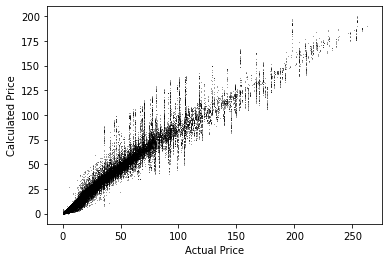

In [15]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

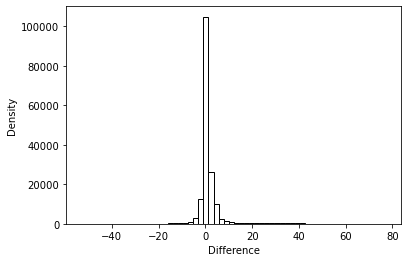

In [16]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [17]:
y_test_pred=model.predict(X_test)

In [18]:
y_test_pred=np.ravel(y_test_pred)

In [19]:
test['Put_MLP']=y_test_pred
test

<ipython-input-19-5677432c360a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_MLP']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_MLP
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,7.641139
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,9.088058
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,10.511787
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,12.107082
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,13.994013
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,66.992531
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,75.729774
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,84.314873
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,92.631676


In [20]:
y_true=test[' [P_LAST]']
y_pred=test['Put_MLP']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.6812978946582176
MSE =  8.72898641307838
RMSE =  2.9544858119609203


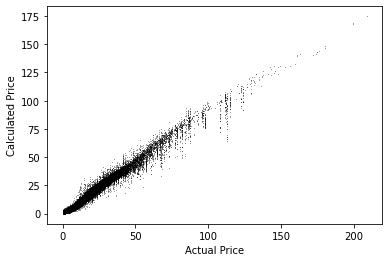

In [21]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

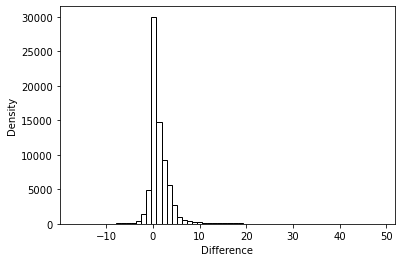

In [22]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [26]:
# train.to_csv('MLP PUT train FINAL Results.csv', mode='a', index=False, header=True)

In [27]:
# test.to_csv('MLP_GREEKS PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [28]:
# model.save('MLP_Put.h5')